In [1]:
import sys
sys.path.append('..')
import torch
from pathlib import Path
from streaming.streamer import MultiStreamer
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

/home/cheoljun/anaconda3/envs/rnnt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


## The data folder should be properly set up by the instruction in README.md
# The trained model should be properly exported as "model_ckpts/tm1k.ckpt"
# or you can put another path in the below configs in `rnnt_ckpt_path` entry.
configs = {'rnnt_ckpt_path': '../model_ckpts/tm1k.ckpt', 
            'streamer_configs': 
               {0: {'type': 'unit',
                   'vocoder_ckpt_path': '../data/vocoder/best_mel_ckpt.pkl',
                   'audio_sr': 16000,
                   'num_prev_unit': 0,
                   'expand_factor': 7.0,
                   'temperature': 1.0,
                   'beam_width': 5,
                   'best_n': 1,
                   'max_tokens': 20,
                   'output_len': 1280,
                   'use_buffer': True,
                   'emit_n': 100,
                   'min_emit_n': 4},
               1: {'type': 'text',
                   'temperature': 1.0,
                   'beam_width': 10,
                   'best_n': 5,
                   'max_tokens': 20,
                   'full_hypo': False}},
                    'context_buffer': 15,
                    'device': device,
                    'buffer_size': 16}


In [3]:
multistreamer = MultiStreamer(**configs)

no gpu available
Loaded model parameters from ../data/vocoder/best_mel_ckpt.pkl.


In [4]:
input_example=  "../data/tm1k_mimed_slow/hgr_2710_5_11826.npy"
ecog = np.load(input_example)[:]

In [5]:
multistreamer.clear_cache()
buffer_size = configs['buffer_size']
input_all = ecog

wavs = []
times = []
for i in range(0,int(len(ecog)//buffer_size*buffer_size),buffer_size):
    x = input_all[i:i+buffer_size]
    outputs = multistreamer(x)
    wav= outputs['wav']
    text=outputs['text']
    times.append(outputs['time'])
    print(f'PRED[{int(1/200*i*1000):03d}ms]-', f'{abs(wav).mean():.02f}', text)
    wavs.append(wav)

# clearing buffer
for i in range(30):
    wavs.append(multistreamer(None)['wav'])
wavs = np.concatenate(wavs)

PREDs]- 0.01 
PREDs]- 0.01 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PRED[1040ms]- 0.00 
PRED[1120ms]- 0.00 
PRED[1200ms]- 0.00 
PRED[1280ms]- 0.00 
PRED[1360ms]- 0.00 
PRED[1440ms]- 0.00 
PRED[1520ms]- 0.00 
PRED[1600ms]- 0.00 
PRED[1680ms]- 0.00 
PRED[1760ms]- 0.00 
PRED[1840ms]- 0.00 
PRED[1920ms]- 0.00 
PRED[2000ms]- 0.00 
PRED[2080ms]- 0.00 
PRED[2160ms]- 0.00 
PRED[2240ms]- 0.00 
PRED[2320ms]- 0.00 
PRED[2400ms]- 0.00 
PRED[2480ms]- 0.00 
PRED[2560ms]- 0.00 
PRED[2640ms]- 0.00 
PRED[2720ms]- 0.00 
PRED[2800ms]- 0.00 
PRED[2880ms]- 0.00 
PRED[2960ms]- 0.12 
PRED[3040ms]- 0.14 
PRED[3120ms]- 0.00 
PRED[3200ms]- 0.00 
PRED[3280ms]- 0.18 
PRED[3360ms]- 0.19 
PRED[3440ms]- 0.15 what
PRED[3520ms]- 0.18 what
PRED[3600ms]- 0.17 what
PRED[3680ms]- 0.05 what
PRED[3760ms]- 0.02 what
PRED[3840ms]- 0.01 what
PRED[3920ms]- 0.01 what
PRED[4000ms]- 0.00 what
PRED[4080ms]- 0.00 what
PR

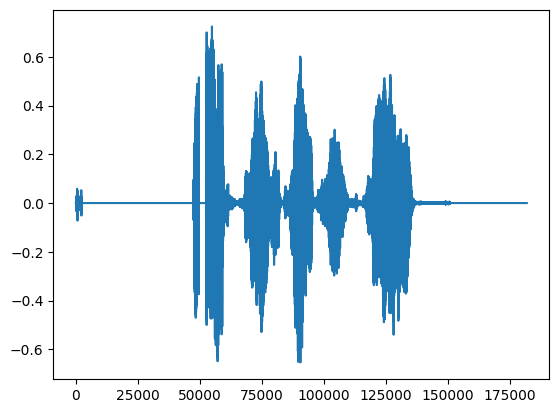

In [6]:
plt.plot(wavs)

ipd.display(ipd.Audio(wavs[:], rate=16000))